In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
#import tensorflow_addons as tfa
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd ./gdrive/MyDrive/CS726/

/content/gdrive/MyDrive/CS726


In [ ]:
from google.colab.patches import cv2_imshow

Trial image for bold font

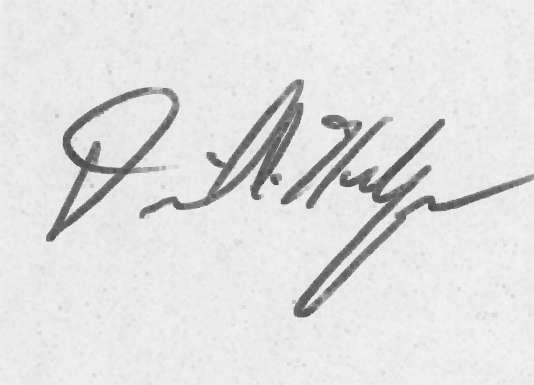

In [ ]:
kernel = np.ones((4,4), np.uint8)
img_path = './signatures/full_org/original_10_1.png'
image = cv2.imread(img_path,0)

img_erosion = cv2.erode(image, kernel, iterations=1)
cv2_imshow(img_erosion)

# Bold transformation on data

In [ ]:
base_dir = "./signatures/full_forg/"
for f in os.listdir(base_dir):
  print(f)
  img_path = base_dir+f 
  image = cv2.imread(img_path,0)
  img_erosion = cv2.erode(image, kernel, iterations=1)
  cv2.imwrite("./bold/full_forg/"+f, img_erosion)

# Texture transformation on data

In [ ]:
img_path = "./trial.jpg"
textr = cv2.imread(img_path,0)
alpha = 0.4
base_dir = "./signatures/full_forg/"
for f in os.listdir(base_dir):
  print(f)
  img_path = base_dir+f 
  image = cv2.imread(img_path,0)
  texture = cv2.resize(textr, (image.shape[1], image.shape[0]) )
  dst = np.uint8(alpha*(image)+(1.0-alpha)*(texture))
  cl2 = cv2.normalize(dst, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)  
  cv2.imwrite("./texture/full_forg/"+f, cl2)
  

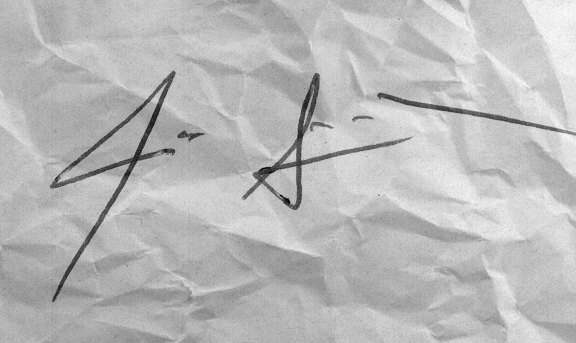

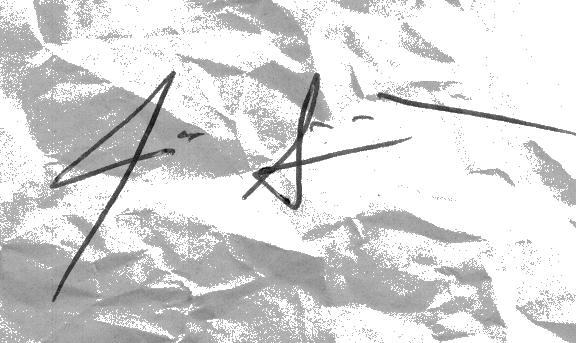

In [ ]:
cl2 = cv2.imread("./texture/full_org/original_1_1.png",0)
cv2_imshow(cl2)
otsu_threshold, _ = cv2.threshold( cl2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh2 = np.where(cl2 > otsu_threshold, 255, cl2)
cv2_imshow(thresh2)

# Preprocessing experiment

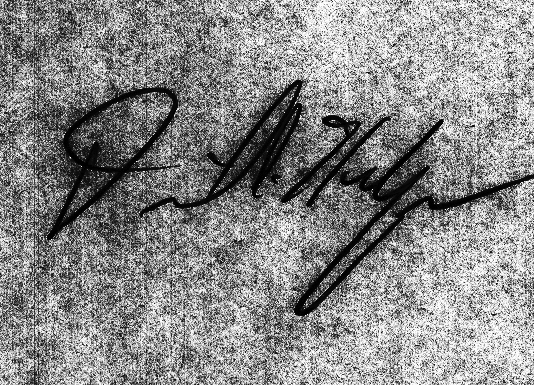

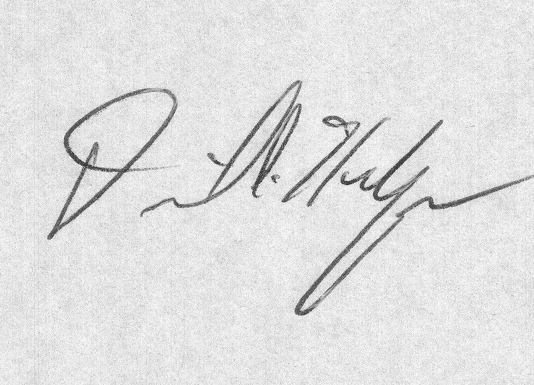

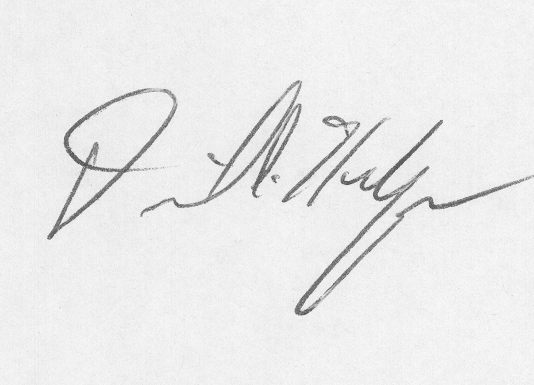

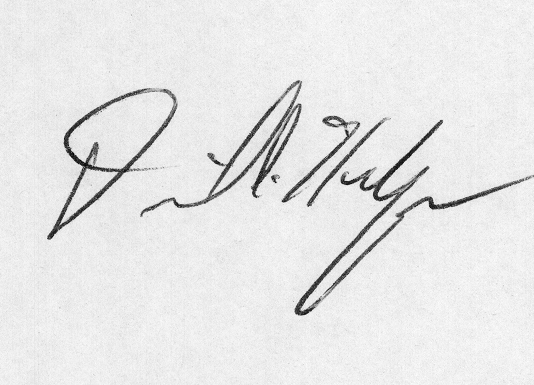

In [ ]:
image = cv2.imread(img_path,0)
temp = cv2.equalizeHist(image)
cv2_imshow(temp)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(image)
cv2_imshow(cl1)
cv2_imshow(image)
cl2 = cv2.normalize(image, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2_imshow(cl2)

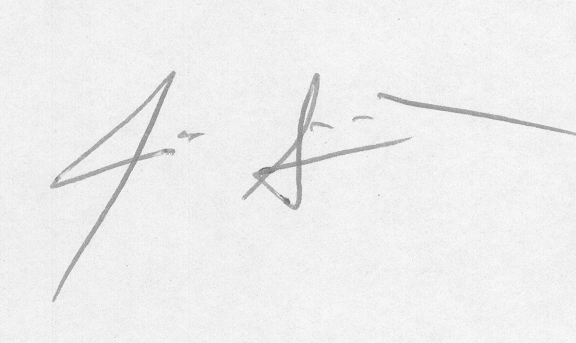

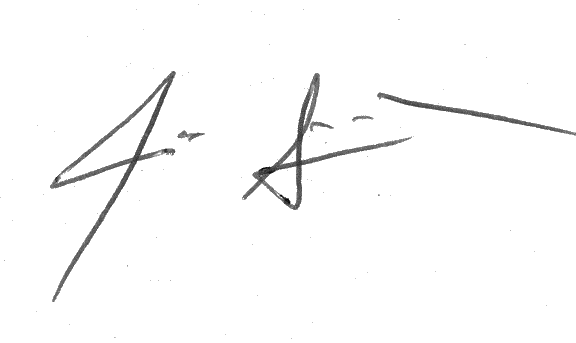

In [ ]:
img_path = "./signatures/full_org/original_1_1.png"
image = cv2.imread(img_path,0)
cl2 = cv2.normalize(image, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
thresh = np.where(cl2 > 200, 255, cl2)
cv2_imshow(image)
cv2_imshow(thresh)